In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
dataset = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')

In [3]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
dataset.shape

(5000, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
dataset.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Dropping the columns

In [10]:
exp = dataset['Experience']
age = dataset['Age']

corr = exp.corr(age)
print('Correlation between Experience and Age :',corr)

Correlation between Experience and Age : 0.9942148569683319


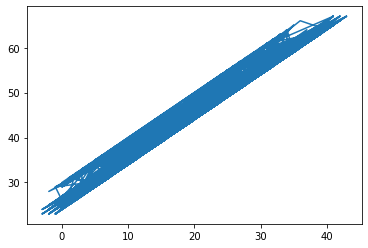

In [11]:
plt.plot(exp,age)
plt.show()

In [12]:
# as correlation betweeen the age and experience is highly correlated
# we can drop experience as it is having the negative values
# Also ID does not containe data which will help us to reach at conslusion
# same for the ZIP Code - It is nominal feature so better to drop it.

In [13]:
dataset = dataset.drop(['ID','Experience','ZIP Code'],axis=1)

In [14]:
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [15]:
dataset.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
dup_rows = dataset[dataset.duplicated()]
print("Number of duplicate rows \n\n", dup_rows)

Number of duplicate rows 

       Age  Income  Family     CCAvg  Education  Mortgage  Personal Loan  \
799    29      39       4  2.100000          3         0              0   
1026   28      43       3  0.100000          2         0              0   
1526   36      80       4  2.200000          2         0              0   
2031   60      80       3  0.500000          1         0              0   
2806   53      59       2  0.800000          3         0              0   
3050   50      58       1  1.300000          2         0              0   
3453   29      31       4  0.300000          2         0              0   
3694   38      21       1  0.666667          3         0              0   
4058   39      65       1  1.500000          3         0              0   
4482   40      28       2  0.800000          3         0              0   
4616   66     114       1  0.800000          3         0              0   
4744   44      72       3  0.300000          3         0              0 

In [17]:
dataset.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# EDA

In [18]:
dataset.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [19]:
(dataset.Mortgage==0).sum()

3462

In [20]:
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [21]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [22]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [23]:
dataset['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [24]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [25]:
dataset['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [26]:
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

# Univariate Analysis 

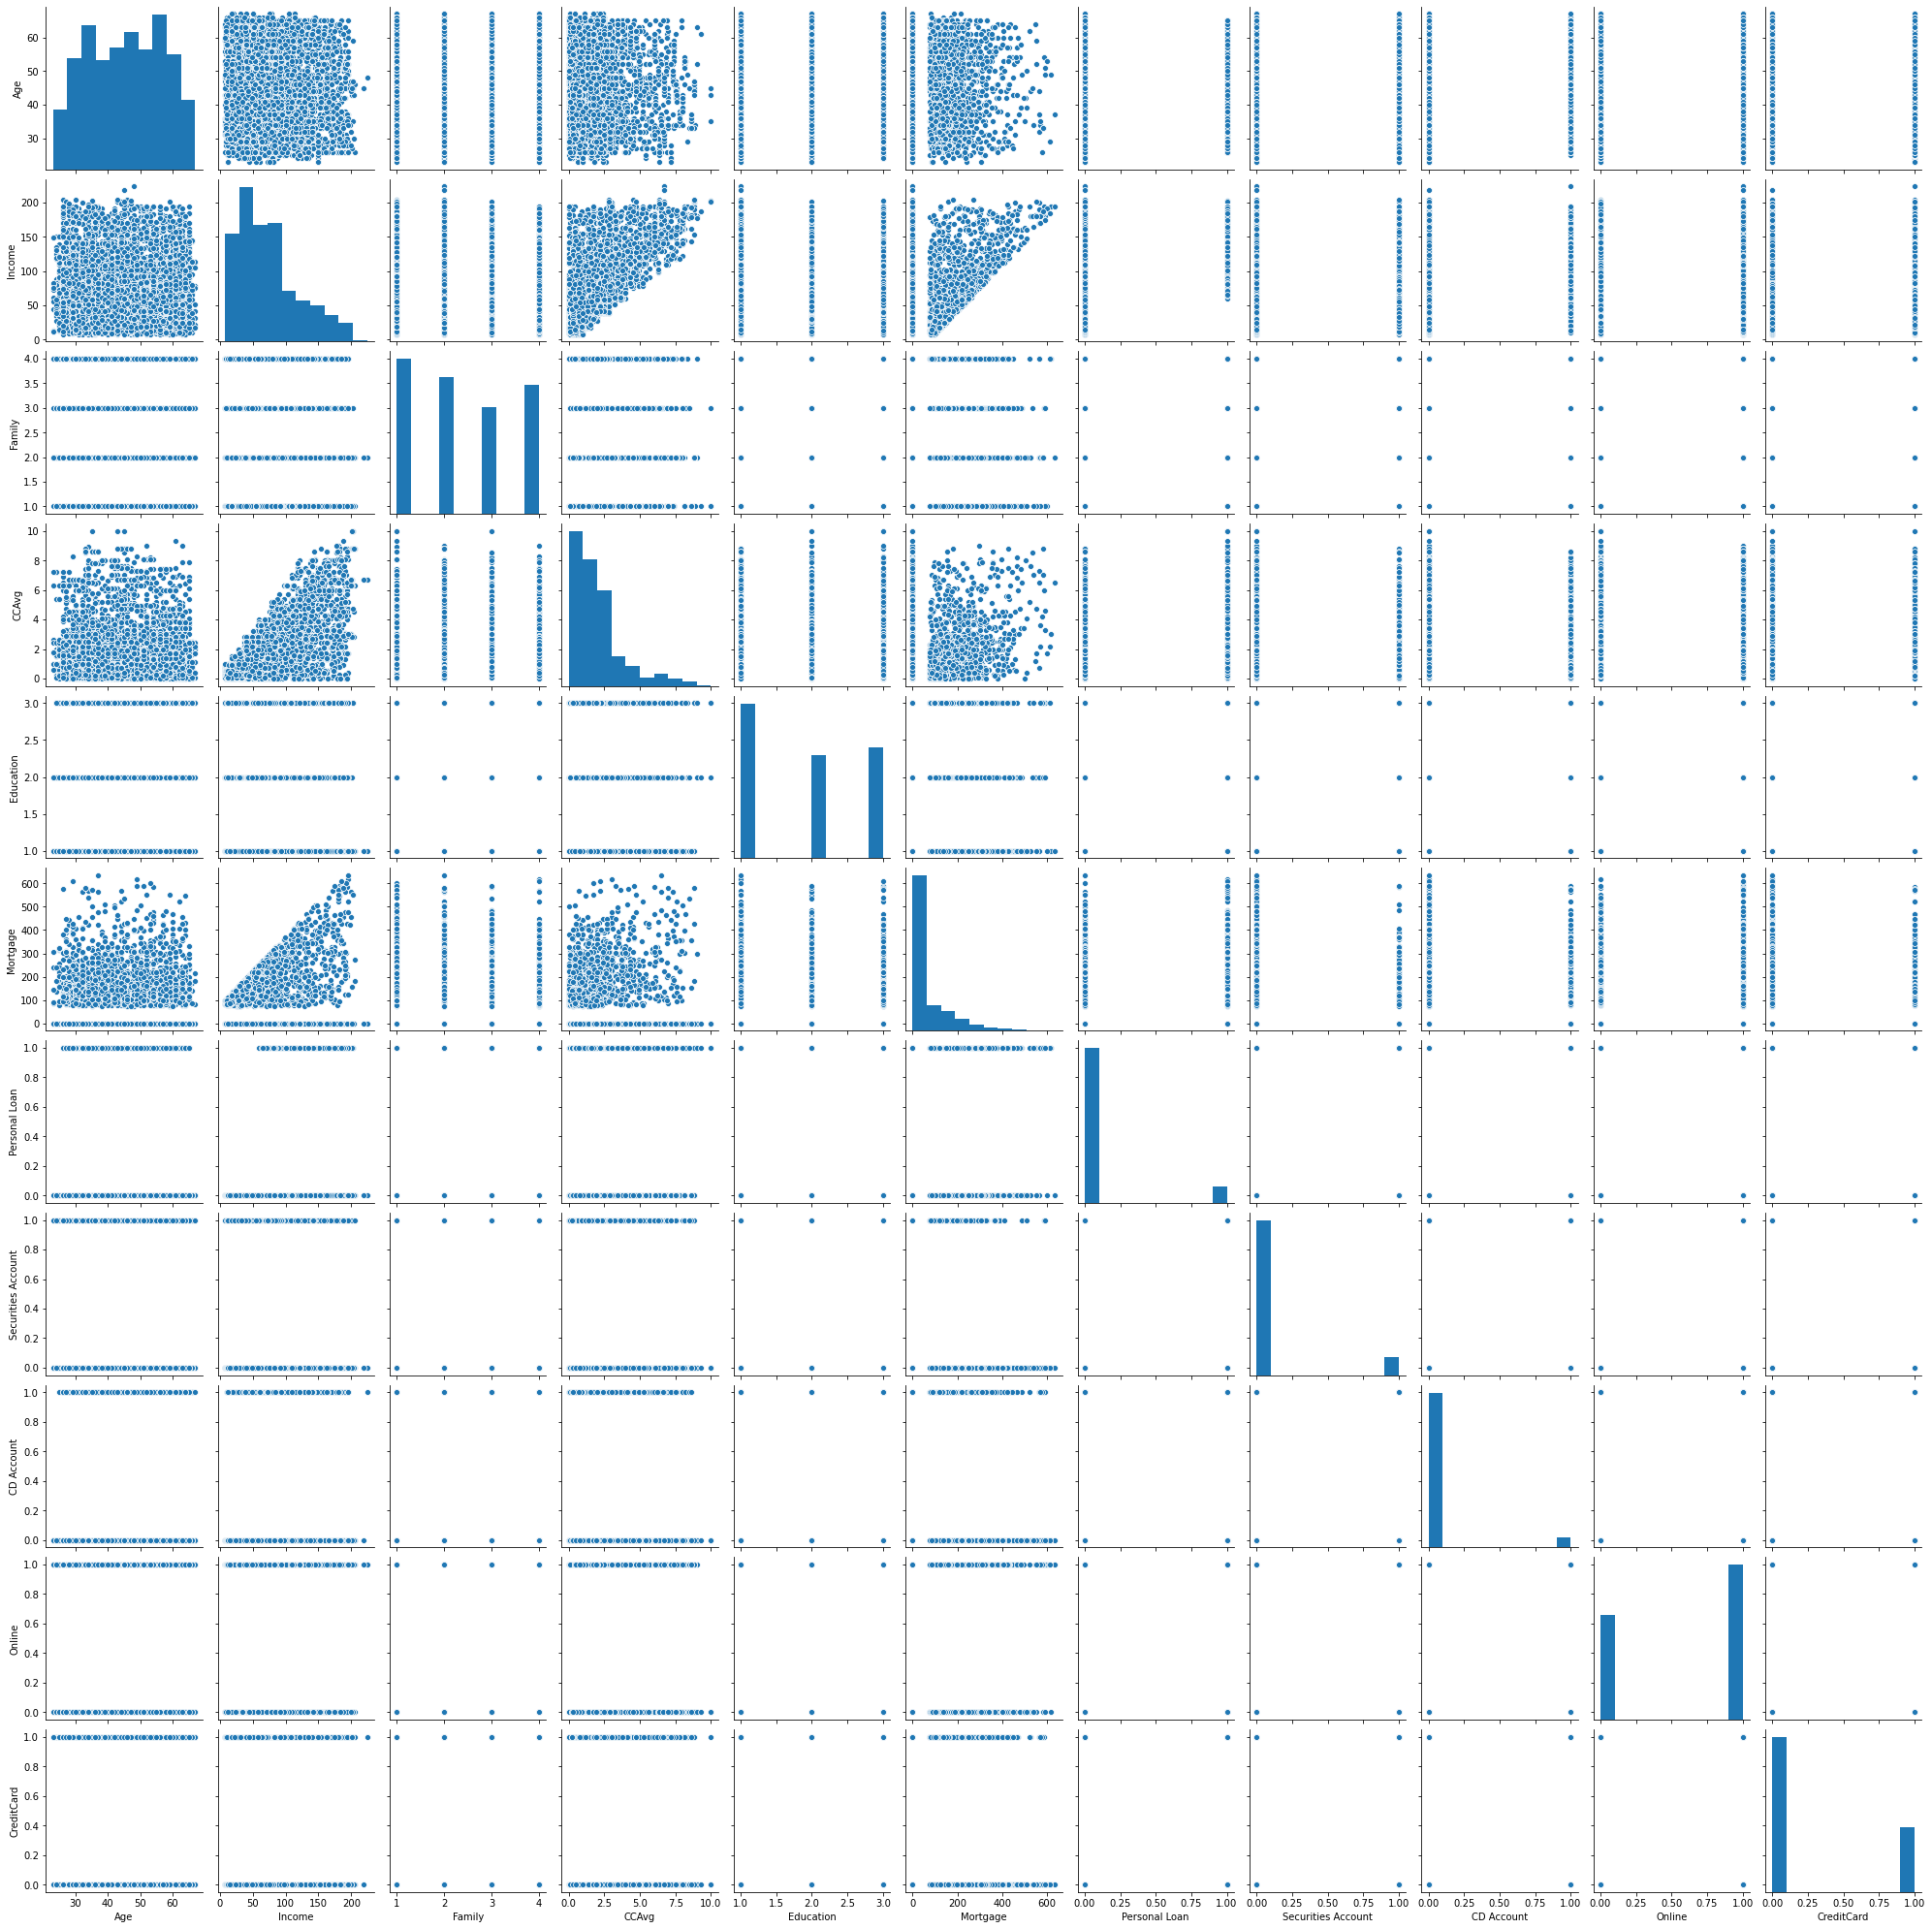

In [27]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='Age'>

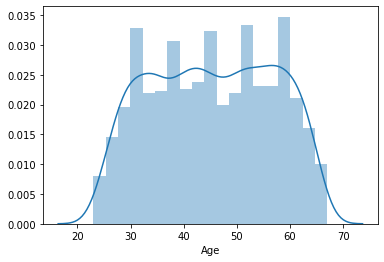

In [28]:
# Symmetric distribution
sns.distplot(dataset.Age)

<AxesSubplot:xlabel='Income'>

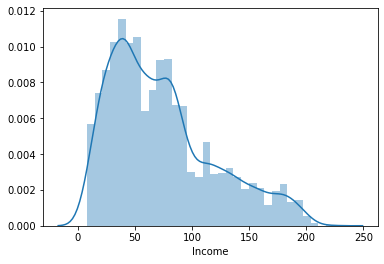

In [29]:
# right skewed distribution
sns.distplot(dataset.Income)

<AxesSubplot:xlabel='CCAvg'>

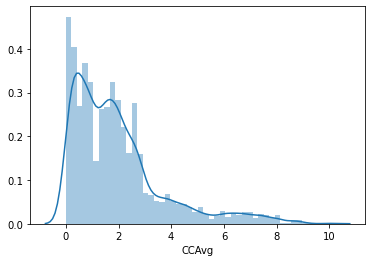

In [30]:
# right skewed distribution
sns.distplot(dataset.CCAvg)

<AxesSubplot:xlabel='Mortgage'>

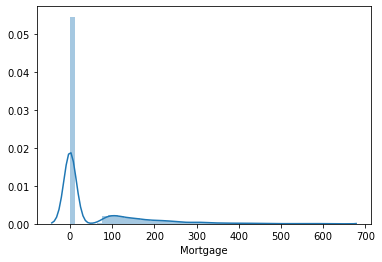

In [31]:
# highly right skewed distribution
sns.distplot(dataset.Mortgage)

<AxesSubplot:xlabel='Family', ylabel='count'>

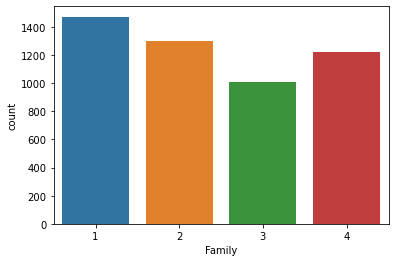

In [32]:
sns.countplot(dataset.Family)

<AxesSubplot:xlabel='Education', ylabel='count'>

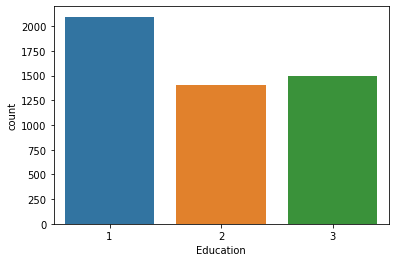

In [33]:
sns.countplot(dataset.Education)

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

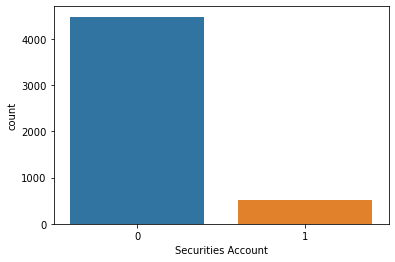

In [34]:
sns.countplot(dataset['Securities Account'])

<AxesSubplot:xlabel='CD Account', ylabel='count'>

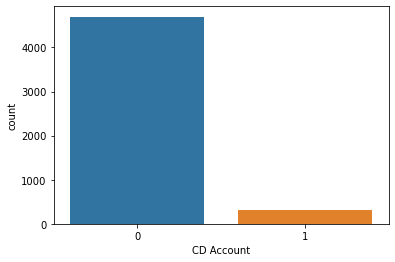

In [35]:
sns.countplot(dataset['CD Account'])

<AxesSubplot:xlabel='Online', ylabel='count'>

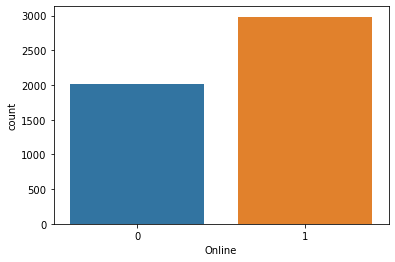

In [36]:
sns.countplot(dataset['Online'])

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

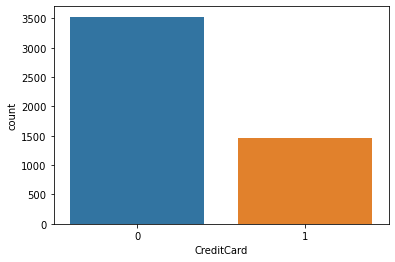

In [37]:
sns.countplot(dataset['CreditCard'])

# Multivariate Analysis

<AxesSubplot:xlabel='Education', ylabel='Income'>

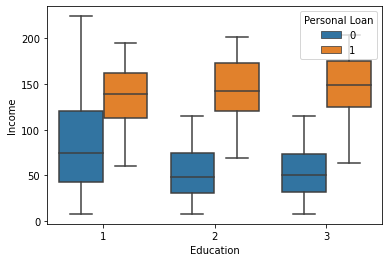

In [38]:
sns.boxplot(x='Education', y='Income' ,hue='Personal Loan' , data=dataset)

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

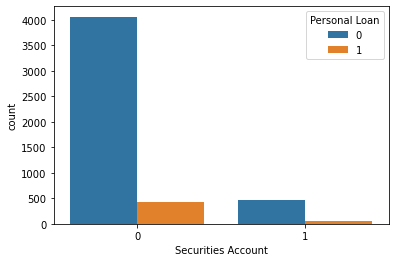

In [39]:
sns.countplot(x='Securities Account',hue='Personal Loan' , data=dataset)

<AxesSubplot:>

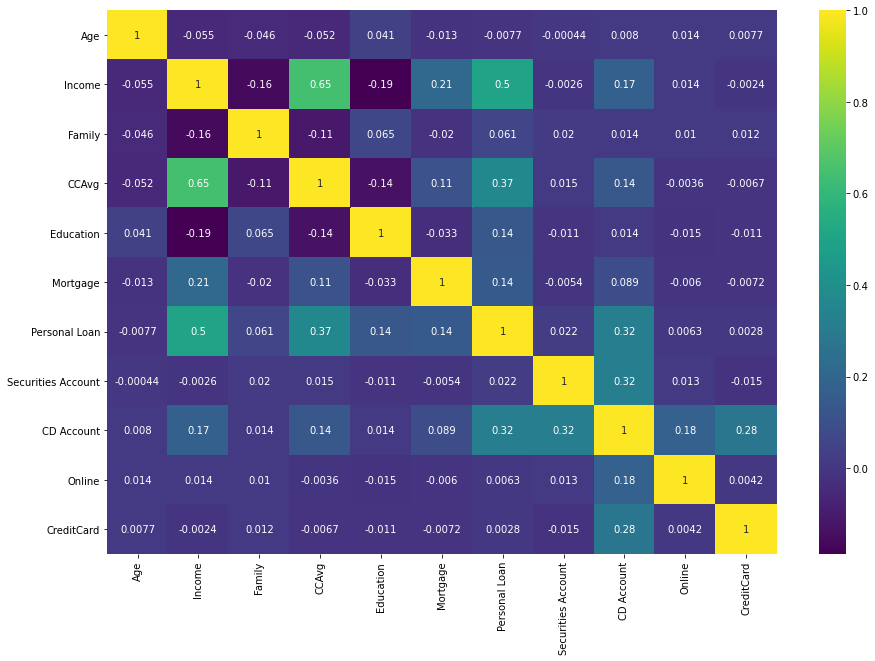

In [40]:
fig , ax = plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr() , cmap='viridis' , annot=True)

# Applying transformations of feature variables


<AxesSubplot:xlabel='Income'>

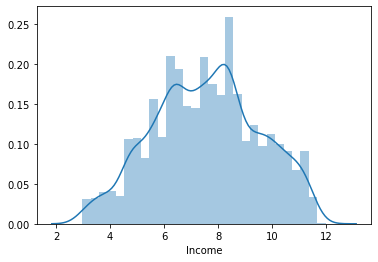

In [41]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson' , standardize=False)
pt.fit(dataset['Income'].values.reshape(-1,1))
dataset.Income = pt.transform(dataset['Income'].values.reshape(-1,1))
sns.distplot(dataset.Income)


<AxesSubplot:xlabel='CCAvg'>

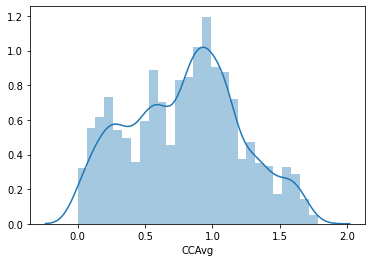

In [42]:
pt = PowerTransformer(method='yeo-johnson' , standardize=False)
pt.fit(dataset['CCAvg'].values.reshape(-1,1))
dataset.CCAvg = pt.transform(dataset['CCAvg'].values.reshape(-1,1))
sns.distplot(dataset.CCAvg)


In [43]:
dataset['new_Mortgage']=pd.cut(dataset['Mortgage'],
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)


In [44]:
dataset.drop(['Mortgage'], axis=1 , inplace=True)

In [45]:
dataset.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,new_Mortgage
0,25,6.827583,4,0.845150,1,0,1,0,0,0,0
1,45,5.876952,3,0.814468,1,0,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,0,1,0


# Personal Loan - Univariate Analysis

In [46]:
temp = pd.DataFrame(dataset['Personal Loan'].value_counts()).reset_index()

In [47]:
temp.columns = ["Labels",'Personal Loan']

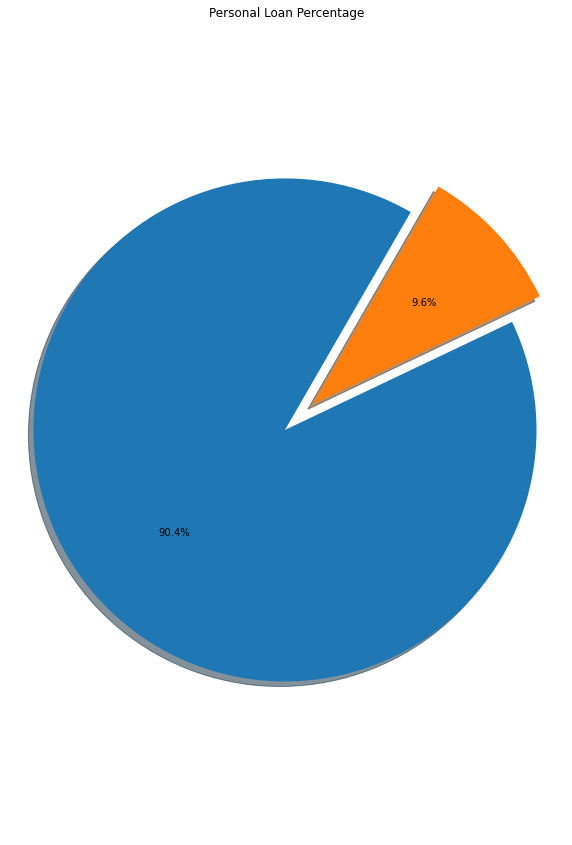

In [48]:
fig1 , ax1 = plt.subplots(figsize=(10,15))
explode=(0,0.15)
ax1.pie(temp['Personal Loan'],explode=explode , autopct='%1.1f%%' , shadow=True , startangle=60)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()


# Spliting the data - Stratified Sampling

In [49]:
dataset.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'new_Mortgage'],
      dtype='object')

In [50]:
X = dataset[['Age', 'Income', 'Family', 'CCAvg', 'Education','Securities Account', 'CD Account', 'Online','CreditCard', 'new_Mortgage']]
Y = dataset['Personal Loan'].values


from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.3 , stratify=Y , random_state=0)


In [51]:
print('X_train count:',x_train.shape ,
      '\nX_test count:', x_test.shape , 
      '\nY_train count:',y_train.shape ,
      '\nY_test count:',y_test.shape)

X_train count: (3500, 10) 
X_test count: (1500, 10) 
Y_train count: (3500,) 
Y_test count: (1500,)


In [52]:
from sklearn.preprocessing import StandardScaler
sx = StandardScaler()
sy = StandardScaler()
sx.fit_transform(x_train)
sx.transform(x_test)

array([[-0.97265109,  1.804387  , -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.85873161,  0.38356794, -0.34389746, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.24827071,  1.16034314, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       ...,
       [ 0.68431421, -0.96255849, -0.34389746, ..., -1.19253735,
         1.52960605,  0.68340496],
       [-0.97265109, -0.36542751, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [-0.01335539, -0.12557467,  0.52957214, ...,  0.83854816,
        -0.65376311, -0.47490853]])

# Models

In [53]:
# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(x_train , y_train)

model1_train = model1.predict(x_train)
model1_test = model1.predict(x_test)

print("Accuracy on training data :",metrics.accuracy_score(y_train,model1_train))
print()
print("Accuracy on test data :",metrics.accuracy_score(y_test,model1_test))
print()
print('Classfication Report : \n ',classification_report(y_test,model1_test))
print('\n Confusion matrix -')
print(confusion_matrix(y_test,model1_test))

Accuracy on training data : 0.954

Accuracy on test data : 0.948

Classfication Report : 
                precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.78      0.63      0.70       144

    accuracy                           0.95      1500
   macro avg       0.87      0.81      0.84      1500
weighted avg       0.94      0.95      0.95      1500


 Confusion matrix -
[[1331   25]
 [  53   91]]


C:\Users\mayur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(x_train , y_train)

model2_train = model2.predict(x_train)
model2_test = model2.predict(x_test)

print("Accuracy on training data :",metrics.accuracy_score(y_train,model2_train))
print()
print("Accuracy on test data :",metrics.accuracy_score(y_test,model2_test))
print()
print('Classfication Report : \n ',classification_report(y_test,model2_test))
print('\n Confusion Matrix - ')
print(confusion_matrix(y_test,model2_test))


Accuracy on training data : 1.0

Accuracy on test data : 0.9826666666666667

Classfication Report : 
                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.91      0.91       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500


 Confusion Matrix - 
[[1343   13]
 [  13  131]]


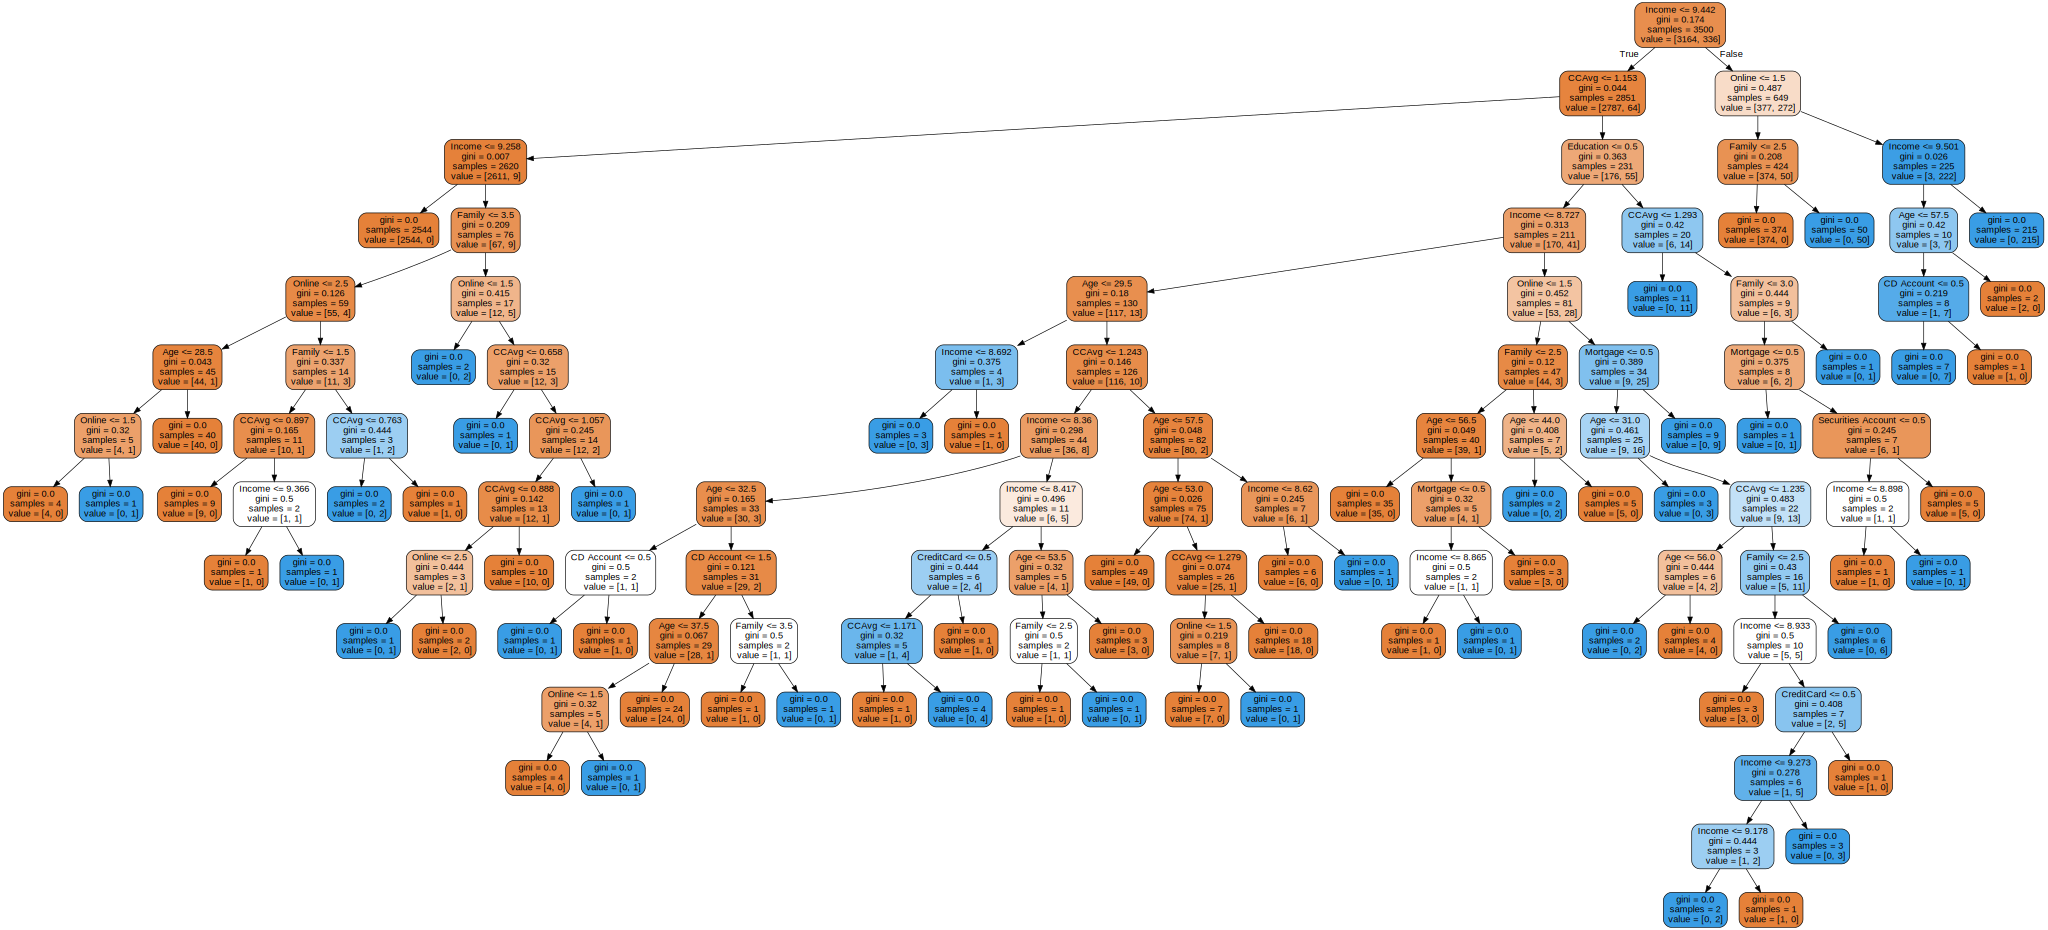

In [56]:
# Decision Tree
import graphviz

from sklearn import tree  
dot_data = tree.export_graphviz(model2, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account'],filled=True, rounded=True) 
graph = graphviz.Source(dot_data)

graph

In [57]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier()

model3.fit(x_train,y_train)

model3_train = model3.predict(x_train)
model3_test = model3.predict(x_test)

print("Accuracy on training data :",metrics.accuracy_score(y_train,model3_train),'\n')
print()
print("Accuracy on test data :",metrics.accuracy_score(y_test,model3_test),'\n')
print()
print('Classfication Report : \n ',classification_report(y_test,model3_test),'\n')
print('\n Confusion Matrix - ')
print(confusion_matrix(y_test,model3_test))


Accuracy on training data : 1.0 


Accuracy on test data : 0.9886666666666667 


Classfication Report : 
                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.97      0.91      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500
 


 Confusion Matrix - 
[[1352    4]
 [  13  131]]


In [58]:
# from above code we can conclude that - Random forest classifier is having higher accuracy and less false negative values